In [4]:
### importo librerías
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.integrate import odeint
import scipy
sns.set_style("darkgrid")

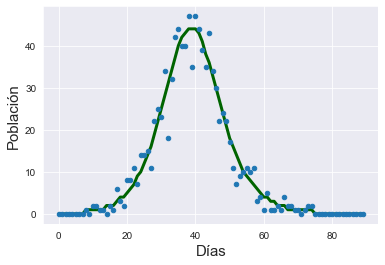

In [8]:
## Modelo para resolver problema directo
def SEYIR(X,t,b,s,g):
    S,E,Y,I,R = X
    dS = -b*I*S/N
    dE = (b*I*S/N)-s*E
    dY = s*E
    dI = s*E-g*I
    dR = g*I
    return [dS,dE,dY,dI, dR]

## No. de Pobladores
N = 1000
## Condiciones iniciales
X0 = [(N -1), 1, 1, 0, 0]
## Parámetros
beta = 0.584   ## S --> E
sigma = 1/4  ## E --> I
gamma = 1/7.1  ## I --> R
### Periodo de tiempo
t = np.linspace(0,90,91)

## Calculo soluciones
sol = odeint(SEYIR, X0, t, args=(beta, sigma, gamma))

## Saco la incidencia con la diferencia de Y, la fuerza de la infección
inci = np.diff(sol[:,2])

## Los guardo para usarlos en los siguientes .ipynb
np.savetxt('datos_inci.txt', inci, fmt='%.15e', delimiter=' ')

## Redondeo para tener conteos realistas, estos son mis DATOS SIN RUIDO
datos_sin = np.round(inci)

## Agregaré ruido (Poisson) a mis DATOS
np.random.seed(123)
datos_con = scipy.stats.poisson.rvs(datos_sin)

## Grafico mis datos con y sin ruido
plt.plot(datos_sin, color = 'darkgreen', linewidth = 3)
plt.plot(datos_con,'o', markersize = 4.5)
plt.xlabel('Días', fontsize = 15)
plt.ylabel('Población', fontsize = 15)
plt.show()